## 3. Contraste de hipótesis

I will try to compare the average result between two variables formed from two groupings of the dataframe. The fact that the average values of each group are not equal does not imply that there is evidence of a significant difference. Because each group has its own variability, sample stockings do not have to be accurate.

So I try to study whether the observed difference between the means of two groups is significant, for this I use the percentage of minutes that my sleep is interrupted on each night according to the day of the week: 'sleep_minutes_awake_per'. To do this I resort to a parametric method such as that based on the T-student distribution where both confidence intervals can be calculated to know between which values are the actual difference of population means or hypothesis test to determine whether the difference is significant.  
**H0**: In the null hypothesis, the two means are considered to have no significant differences. $\mu_1$ = $\mu_2$  
**H1**: In the alternative scenario, the means of the two variables (groupings) if they have significant differences. $\mu_1$ > $\mu_2$  
With a 95% confidence degree (Significance level  α = 0.05)

The significance level – determines the probability of error you want to assume when rejecting the H0. It is used as a benchmark to determine whether the p-value obtained in the hypothesis test is low enough to consider the observed differences significant and therefore reject H0.  
For example, as I consider α=0.05, **H0** in favour of H1 **will be rejected** if the se **p-value < 0.05**, and you'll have a 5% chance of rejecting H0 when it's really true.  

I have to determine the type of test, one or two queues: **Hypothesis tests** can be from one queue or two queues. If H1 uses  “>” or “<” it is a test of a tail, in which only deviations in a sense are analyzed. If H1 is of the type $\neq$ it is a two-tailed test, in which possible deviations are analyzed in the two directions. I try to use the test of a tail because from the analyses developed above I know that the deviations of interest are in a sense where I choose the grouped variable of the two days of the week with the most % minutes of sleep interruption (Monday and Tuesday) in front of to the rest of the week and in a second test where I choose the day with the highest % (Monday) versus the day with the lowest % (Thursday).  
In this case I assume that the two variables are independent.
The t-statistic is the value that is calculated from the sample and that you want to extrapolate to the source population. In this case it is the difference of the sample stockings.
I use the scipy.stats library using ttest_ind (T-test: Comparison of independent population stockings)  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Comparación entre Lun/Mar vs resto semana: El p-value = 0.001 y el estadístico de t = 3.25
Comparación entre Lunes vs Jueves: El p-value = 0.001 y el estadístico de t = 3.16


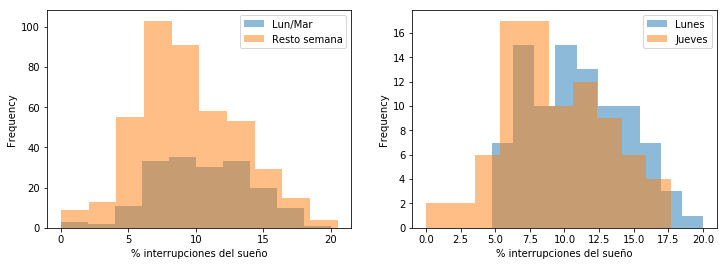

In [12]:
Lun_Mar_desp_porc = df_final[(df_final['weekday'] == 0) | (df_final['weekday'] == 1)]['sleep_minutes_awake_per']
restsemana_desp_porc = df_final[(df_final['weekday'] != 0) & (df_final['weekday'] != 1)]['sleep_minutes_awake_per']
Lun_Mar_desp_porc = Lun_Mar_desp_porc.dropna()
restsemana_desp_porc = restsemana_desp_porc.dropna()

Lun_desp_porc = df_final[(df_final['weekday'] == 0)]['sleep_minutes_awake_per']
Juev_desp_porc = df_final[(df_final['weekday'] == 3)]['sleep_minutes_awake_per']

Lun_desp_porc = Lun_desp_porc.dropna()
Juev_desp_porc = Juev_desp_porc.dropna()



from scipy.stats import ttest_ind
test1 = ttest_ind(Lun_Mar_desp_porc, restsemana_desp_porc, axis=0, equal_var=False)
test2 = ttest_ind(Lun_desp_porc, Juev_desp_porc, axis=0, equal_var=False)

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(121)
Lun_Mar_desp_porc.plot(kind = 'hist', alpha = 0.5, color = colrcode[0],label = 'Lun/Mar')
restsemana_desp_porc.plot(kind = 'hist', alpha = 0.5, color = colrcode[1],label = 'Resto semana')
plt.xlabel('% interrupciones del sueño')
plt.legend()

ax2 = fig.add_subplot(122)
p = Lun_desp_porc.plot(kind = 'hist', alpha = 0.5, color = colrcode[0],label = 'Lunes')
p = Juev_desp_porc.plot(kind = 'hist', alpha = 0.5, color = colrcode[1],label = 'Jueves')
plt.xlabel('% interrupciones del sueño')
plt.legend()


print('Comparación entre Lun/Mar vs resto semana: El p-value = {0} y el estadístico de t = {1}'
      .format(round(test1.pvalue/2,3),round(test1.statistic,2)))

print('Comparación entre Lunes vs Jueves: El p-value = {0} y el estadístico de t = {1}'
      .format(round(test2.pvalue/2,3),round(test2.statistic,2)))

**Observations**:  
- In the first test, the H0 is rejected because p-value < α so we accept H1 and consider that the average % of sleep interruptions is higher on Mondays and Tuesdays compared to the rest of the week (p = 0,001).  
- The second test also rejects the H0 because p-value <' so we accept H1 and consider that the average % disruption of sleep on Mondays (days with higher sleep disruption) is bigger than Thursdays (days with the lowest level of sleep disruption)(p = 0.001))